In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter

In [2]:
def plot_3d(n_cell, T_terminal, rho, ax_name, fig_name=None):
    fig = plt.figure(figsize=(8, 8))
    ax = fig.gca(projection='3d')
    x = np.linspace(0, 1, n_cell)
    t = np.linspace(0, T_terminal, n_cell * T_terminal)
    t_mesh, x_mesh = np.meshgrid(t, x)
    surf = ax.plot_surface(x_mesh, t_mesh, rho, cmap=cm.jet, linewidth=0, antialiased=False)
    ax.grid(False)
    ax.tick_params(axis='both', which='major', labelsize=18, pad=10)

    ax.set_xlabel(r"$x$", fontsize=24, labelpad=20)
    ax.set_xlim(min(x), max(x))
    ax.xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
    ax.xaxis.set_major_locator(LinearLocator(5))
    ax.xaxis.set_major_formatter(FormatStrFormatter('%.02f'))

    plt.ylabel(r"$t$", fontsize=24, labelpad=20)
    ax.set_ylim(min(t), max(t))
    ax.yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
    ax.yaxis.set_major_locator(LinearLocator(5))
    ax.yaxis.set_major_formatter(FormatStrFormatter('%.02f'))

    ax.set_zlabel(ax_name, fontsize=24, labelpad=20, rotation=90)
    # if ax_names == 'u':
    #     ax.set_zlim(.6, 1.)
    # else:
    #     ax.set_zlim(.2, .5)
    ax.zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
    ax.zaxis.set_major_locator(LinearLocator(5))
    ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))
    ax.view_init(elev=25, azim=-128)
    if not fig_name:
        plt.show()
    else:
        plt.savefig(fig_name, bbox_inches='tight')

In [3]:
n_cell = 8
T_terminal = 1
T = n_cell * T_terminal
u = np.ones((n_cell, T)) * 0.5
d = np.loadtxt(f"data/rho-sep.txt")[:, 0].flatten("F")

In [4]:
def get_rho_from_u(u, d):
    n_cell = u.shape[0]
    T_terminal = int(u.shape[1] / u.shape[0])
    rho = np.zeros((n_cell, n_cell * T_terminal), dtype=np.float64)
    for t in range(n_cell * T_terminal):
        for i in range(n_cell):
            if t == 0:
                rho[i, t] = d[i]
            else:
                if i == 0:
                    rho[i, t] = rho[i, t - 1] + rho[-1, t - 1] * u[-1, t - 1] - rho[i, t - 1] * u[i, t - 1]
                else:
                    rho[i, t] = rho[i][t - 1] + rho[i - 1, t - 1] * u[i - 1, t - 1] - rho[i, t - 1] * u[i, t - 1]

    return rho

<ipython-input-2-f5c1dde417b9>:3: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


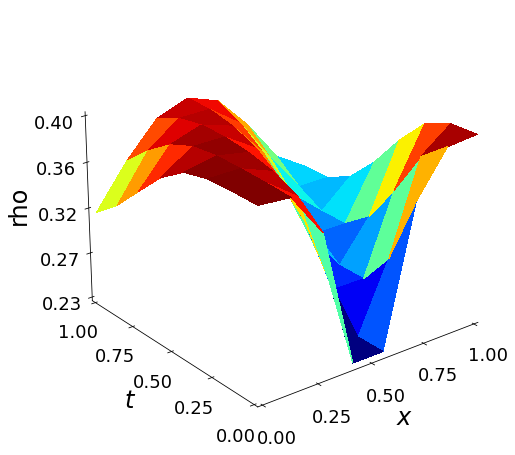

In [5]:
rho = get_rho_from_u(u, d)
plot_3d(n_cell, T_terminal, rho, 'rho')

In [18]:
%clear

n_cell = 8
T_terminal = 1
T = n_cell * T_terminal
d = np.loadtxt(f"data/rho-sep.txt")[:, 0].flatten("F")

In [19]:
def get_rho_from_u_at_t(n_cell, rho):
    for i in range(n_cell):
        rho[i] += rho[i - 1] * 0.5 - rho[i] * 0.5
        
    return rho

<ipython-input-2-f5c1dde417b9>:3: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


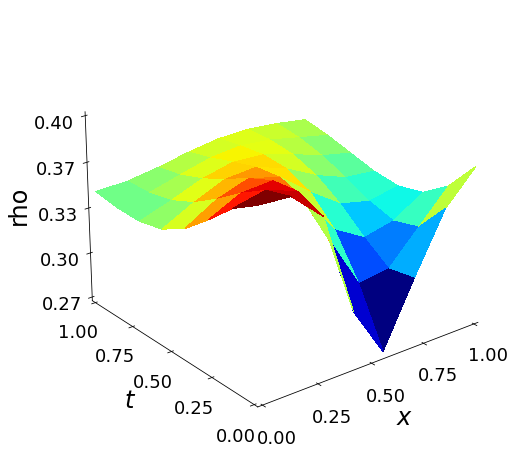

In [20]:
rho_2d = np.zeros((n_cell, T))
rho = d
for t in range(T):
    rho = get_rho_from_u_at_t(n_cell, rho)
    rho_2d[:, t] = rho
    
plot_3d(n_cell, T_terminal, rho_2d, 'rho')